# Series de Fourier

In [49]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

## Aproximación de $f(x) = x^2$ mediante una serie de Fourier

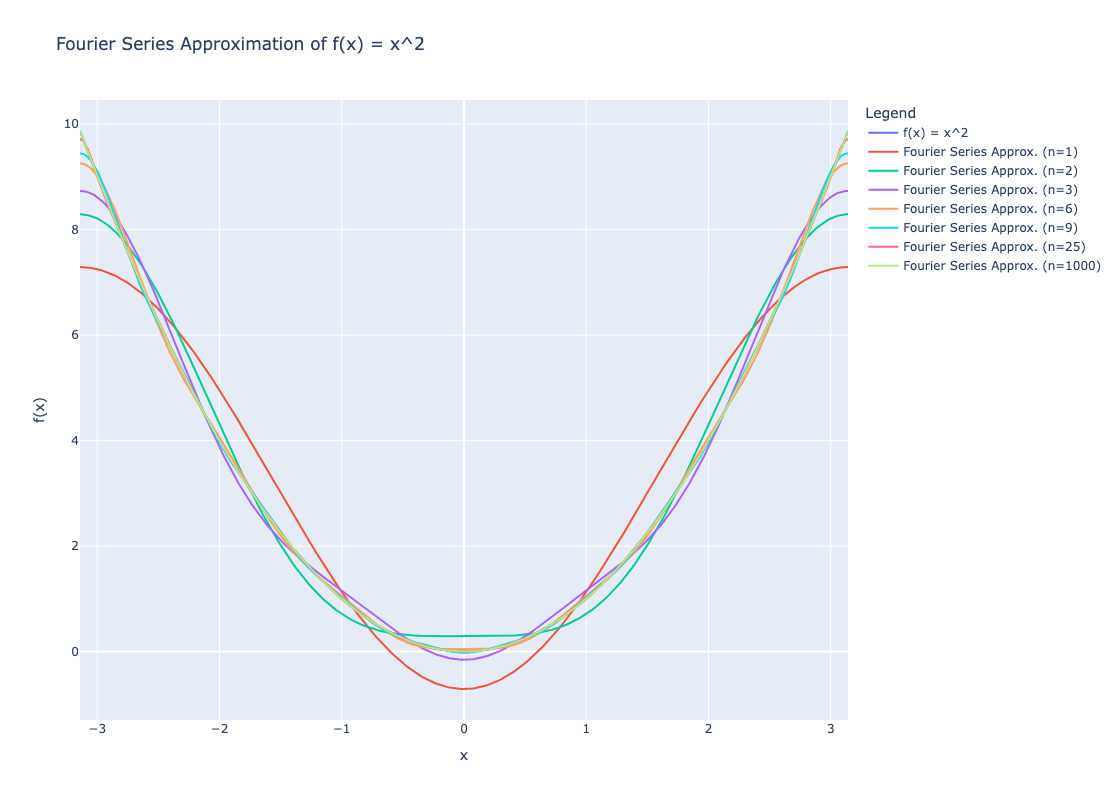

In [47]:
# Define the function and the Fourier series approximation
def f(x):
    return x**2

def fourier_series(x, p, n_terms):
    a0 = p**2 / 3
    series_sum = a0
    for n in range(1, n_terms + 1):
        an = ((-1)**n * 4 * p**2) / (n**2 * np.pi**2)
        series_sum += an * np.cos(n * np.pi * x / p)
    return series_sum

# Define the interval and the number of terms in the Fourier series
p = np.pi
x = np.linspace(-p, p, 400)
n_terms = [1, 2, 3, 6, 9, 25, 1000]

# Calculate the function values
f_values = f(x)

# Create figure
fig = make_subplots()

# Add trace for the original function
fig.add_trace(go.Scatter(x=x, y=f_values, mode='lines', name='f(x) = x^2'))

# Add traces for each term in the Fourier series
for n in n_terms:
    fourier_values = fourier_series(x, p, n)
    fig.add_trace(go.Scatter(x=x, y=fourier_values, mode='lines', name=f'Fourier Series Approx. (n={n})'))

# Create frames
frames = []
for n in n_terms:
    fourier_values = fourier_series(x, p, n)
    frames.append(go.Frame(data=[go.Scatter(x=x, y=fourier_values, mode='lines', name=f'Fourier Series Approx. (n={n})')],
                           name=f'Frame {n}'))

# Update layout with animation settings and larger size
fig.update_layout(
    title='Fourier Series Approximation of f(x) = x^2',
    xaxis_title='x',
    yaxis_title='f(x)',
    legend_title='Legend',
    width=1000,  # Set the width of the plot
    height=800,  # Set the height of the plot
)

# Show the plot
pio.show(fig)


## Ejemplo 1, Sección 11.2, Zill 9na Ed.

El ejemplo pide aproximar usando una serie de Fourier la función

\begin{equation}
f(x) = \begin{cases}
            0, & -\pi < x < 0 \\
            \pi - x, & 0 \leq x < \pi
        \end{cases}
\end{equation}

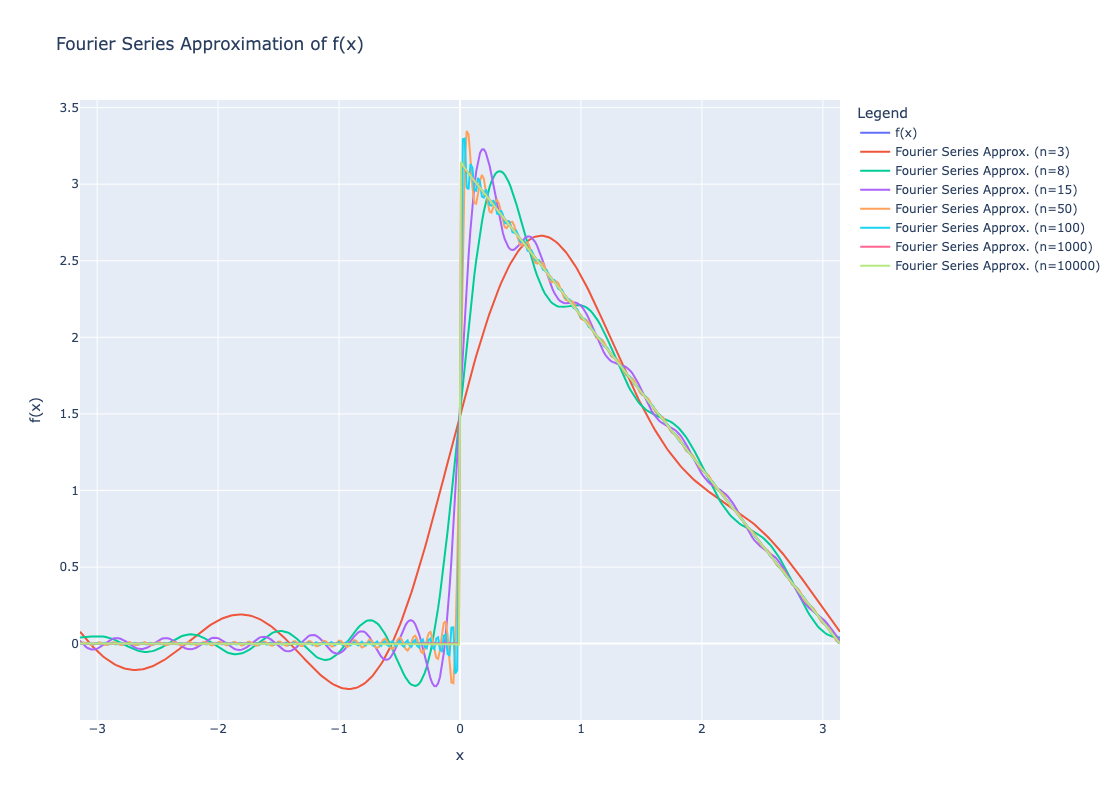

In [82]:
# Define the function and the Fourier series approximation
def f(x):        
    aux = np.nan * np.ones_like(x)
    aux[x < 0] = 0
    aux[x > 0] = (np.pi - x[x > 0])
    return aux

def fourier_series(x, p, n_terms):
    a0 = p / 4
    series_sum = a0
    for n in range(1, n_terms + 1):
        an = (1- (-1)**n) / (n**2 * np.pi)
        bn = 1/n
        series_sum += an * np.cos(n * np.pi * x / p) + bn * np.sin(n * np.pi * x / p)
    return series_sum

# Define the interval and the number of terms in the Fourier series
p = np.pi
x = np.linspace(-p, p, 400)
n_terms = [3, 8, 15, 50, 100, 1000, 10000]

# Create figure
fig = make_subplots()

# Add trace for the original function
epsilon = 1e-10;
x_true_left = np.linspace(-np.pi+epsilon, 0-epsilon, 100)
x_true_right = np.linspace(0, np.pi-epsilon, 100)
x_true = np.concatenate((x_true_left, x_true_right))
f_values = f(x_true)
fig.add_trace(go.Scatter(x=x_true, y=f_values, mode='lines', name='f(x)'))

# Add traces for each term in the Fourier series
for n in n_terms:
    fourier_values = fourier_series(x, p, n)
    fig.add_trace(go.Scatter(x=x, y=fourier_values, mode='lines', name=f'Fourier Series Approx. (n={n})'))

# Create frames
frames = []
for n in n_terms:
    fourier_values = fourier_series(x, p, n)
    frames.append(go.Frame(data=[go.Scatter(x=x, y=fourier_values, mode='lines', name=f'Fourier Series Approx. (n={n})')],
                           name=f'Frame {n}'))

# Update layout with animation settings and larger size
fig.update_layout(
    title='Fourier Series Approximation of f(x)',
    xaxis_title='x',
    yaxis_title='f(x)',
    legend_title='Legend',
    width=1000,  # Set the width of the plot
    height=800,  # Set the height of the plot
)

# Show the plot
pio.show(fig)


Las oscilaciones que se verifican cerca del punto de discontinuidad se denomina **Fenómeno de Gibbs**. Véase Sección 11.3 del Zill 9na Edición, Pág. 439.